In [22]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [23]:
class BatsmanState(TypedDict):

    runs : int
    balls : int
    fours : int
    sixes : int 

    sr: float
    bpb : float 
    boundry_percent : float
    summary : str

In [34]:
def calculate_sr(state: BatsmanState) -> float:
    if state['balls'] == 0:
        return 0.0
    sr = (state['runs'] / state['balls']) / 100

    return { "sr": sr }

In [35]:
def calculate_bpb(state:BatsmanState) -> float:
    
    pbp = state['balls']/state['fours'] + state['sixes']


    return { "bpb": pbp }

In [36]:
def calculate_boundary_percent(state:BatsmanState) -> float:

    boundry_percent =   (((state['fours'] * 4 ) + (state['sixes'] * 6 )) / state['runs']) * 100

    return { "boundry_percent": boundry_percent }

In [44]:
def summary(state:BatsmanState) -> str:

    summary =  f"""
    Strike Rate: {state['sr']:.2f}
    Balls per Boundary: {state['bpb']:.2f}
    Boundary Percentage: {state['boundry_percent']:.2f}%
    """

    #state['summary'] = summary
    return {'summary': summary}

In [45]:
graph = StateGraph(BatsmanState)

In [46]:
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percent', calculate_boundary_percent)
graph.add_node('summary', summary)


#add edges
graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()


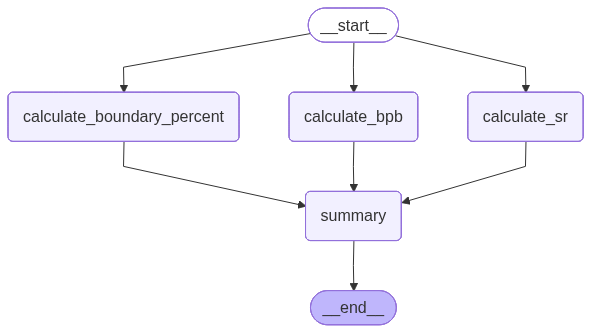

In [47]:
workflow

In [48]:
initial_state = {
    'runs': 250,
    'balls': 200,
    'fours': 20,
    'sixes': 10
}

In [49]:
final_state = workflow.invoke(initial_state)

In [50]:
final_state

{'runs': 250,
 'balls': 200,
 'fours': 20,
 'sixes': 10,
 'sr': 0.0125,
 'bpb': 20.0,
 'boundry_percent': 56.00000000000001,
 'summary': '\n    Strike Rate: 0.01\n    Balls per Boundary: 20.00\n    Boundary Percentage: 56.00%\n    '}